In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

In [3]:
hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

In [3]:
hdmi_in.tie(hdmi_out)

In [12]:
import time

numframes = 600
start = time.time()

for _ in range(numframes):
    f = hdmi_in.readframe()
    hdmi_out.writeframe(f)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  60.08031327735984


In [13]:
type(f)

pynq.buffer.PynqBuffer

In [14]:
import cv2
import numpy as np

numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                       dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                    dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_BGR2GRAY,dst=grayscale)
    inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2BGR,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  2.5710739469168717


In [17]:
hdmi_out.close()
hdmi_in.close()

In [18]:
base.download()

hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)
hdmi_out.cacheable_frames = False
hdmi_in.cacheable_frames = False
hdmi_out.start()
hdmi_in.start()

In [19]:
hdmi_in.tie(hdmi_out)

In [14]:
import PIL.Image

frame = hdmi_in.readframe()

In [7]:
type(frame)

pynq.buffer.PynqBuffer

In [5]:
frame

PynqBuffer([[[ 77,  85,  89],
             [ 77,  85,  88],
             [ 77,  85,  88],
             ..., 
             [ 77,  85,  88],
             [ 77,  85,  88],
             [ 77,  85,  88]],

            [[ 76,  84,  87],
             [ 76,  84,  87],
             [ 76,  84,  87],
             ..., 
             [ 76,  84,  87],
             [ 76,  84,  87],
             [ 76,  84,  87]],

            [[ 75,  83,  86],
             [ 75,  83,  86],
             [ 75,  83,  86],
             ..., 
             [ 75,  83,  87],
             [ 75,  83,  86],
             [ 75,  83,  86]],

            ..., 
            [[ 45,  49,  50],
             [ 45,  49,  50],
             [ 45,  49,  50],
             ..., 
             [242, 241, 241],
             [242, 241, 241],
             [242, 241, 241]],

            [[ 45,  49,  50],
             [ 45,  49,  50],
             [ 45,  49,  50],
             ..., 
             [241, 241, 241],
             [241, 241, 242],
         

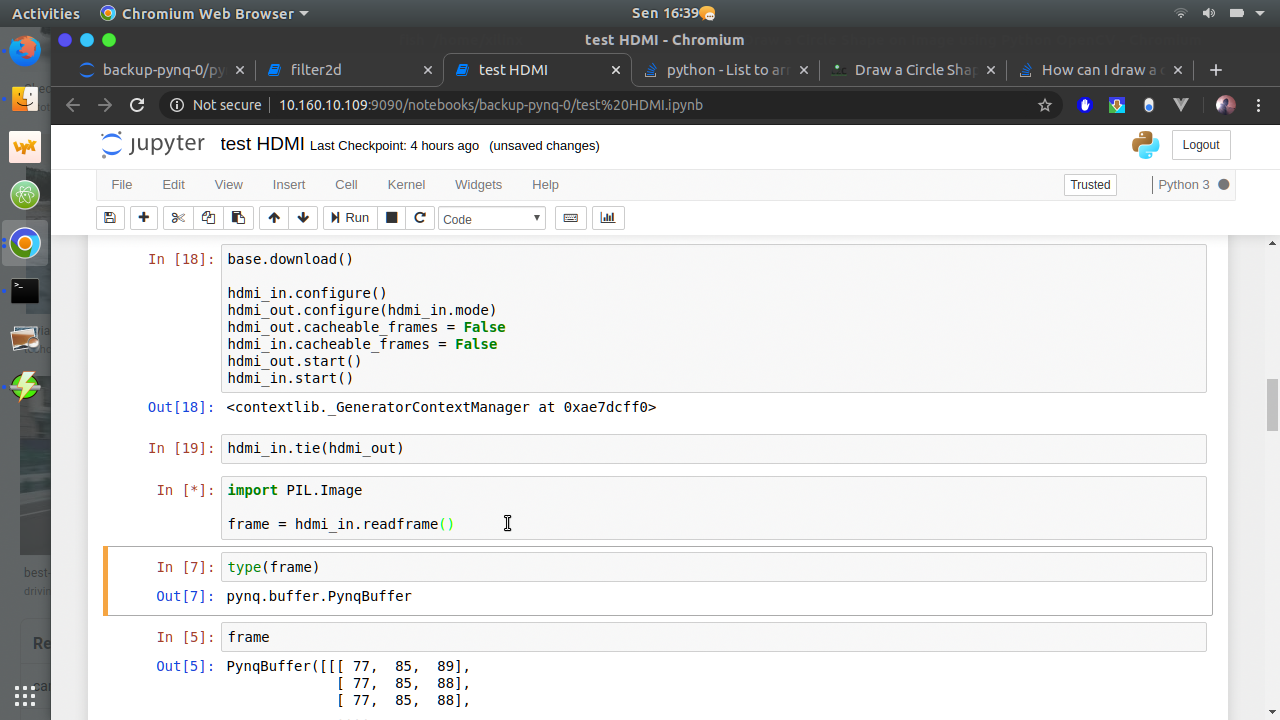

In [5]:
image = PIL.Image.fromarray(frame)
image

In [8]:
import numpy
arr = numpy.asarray(frame)

In [9]:
type(arr)

numpy.ndarray

In [6]:
hdmi_out.writeframe(frame)

In [7]:
import cv2
import numpy as np
img = cv2.circle(frame, (200, 200), 100, (0, 0, 0))

In [15]:
hdmi_out.writeframe(frame)

In [9]:
len(img)

720

In [16]:
i = 0
for _ in range(len(img)):
    f = hdmi_in.readframe()
    img = cv2.circle(f, (i, 200), 100, (0, 0, 0))
    hdmi_out.writeframe(img)
    i=i+1